In [1]:
import sys ,os
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

import configparser
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from TFM_MUIT.utils import get_num_files, read_nii

config = configparser.ConfigParser()
config.read("../config.ini")


['../config.ini']

In [2]:
COVID_SEG_1_PATH = config['PATHS']['COVID_SEG_1_PATH']

COVID_SEG_1_TRAINIG_IMAGES_PATH = os.path.join(COVID_SEG_1_PATH, "tr_im.nii")
COVID_SEG_1_TRAINING_INFECTION_MASKS_PATH = os.path.join(COVID_SEG_1_PATH, "tr_mask.nii")
COVID_SEG_1_TRAINING_LUNG_MASKS_PATH = os.path.join(COVID_SEG_1_PATH, "tr_lungmasks_updated.nii")
COVID_SEG_1_METADATA_PATH = os.path.join(COVID_SEG_1_PATH, "Test-Images-Clinical-Details.csv")

# Metadata

In [9]:
covid_seg_1_metadata_df = pd.read_csv(COVID_SEG_1_METADATA_PATH)
print(covid_seg_1_metadata_df.shape)
covid_seg_1_metadata_df.head()

(106, 7)


,SIRM Case,Slice position in .nii.gz,Patient age,Patient Sex (Male = 0 Female = 1),Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,60.0,80.0,0.0,NaN,NaN,NaN
1,2,2.0,62.0,0.0,NaN,NaN,NaN
2,2,89.0,NaN,NaN,NaN,NaN,NaN
3,3,72.0,57.0,0.0,NaN,NaN,NaN
4,3,70.0,NaN,NaN,NaN,NaN,NaN


# Data

In [4]:
training_images_nii = read_nii(COVID_SEG_1_TRAINIG_IMAGES_PATH)
training_lung_masks_nii = read_nii(COVID_SEG_1_TRAINING_LUNG_MASKS_PATH)
training_infection_masks_nii = read_nii(COVID_SEG_1_TRAINING_INFECTION_MASKS_PATH)

print(training_images_nii.shape)
print(training_lung_masks_nii.shape)
print(training_infection_masks_nii.shape)

(512, 512, 100)
(512, 512, 100)
(512, 512, 100)


(array([220941.,  25820.,  15383.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

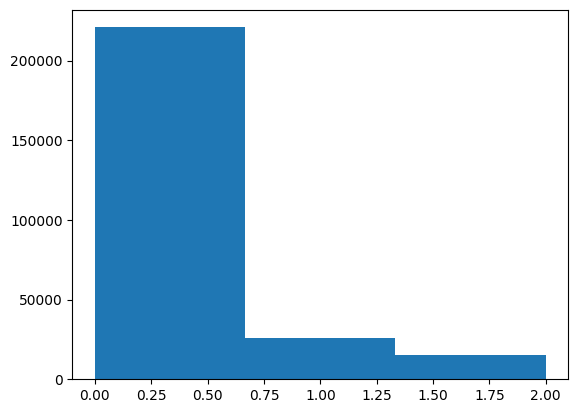

In [20]:
plt.hist(training_lung_masks_nii[...,0 ].flatten(), bins = 3)

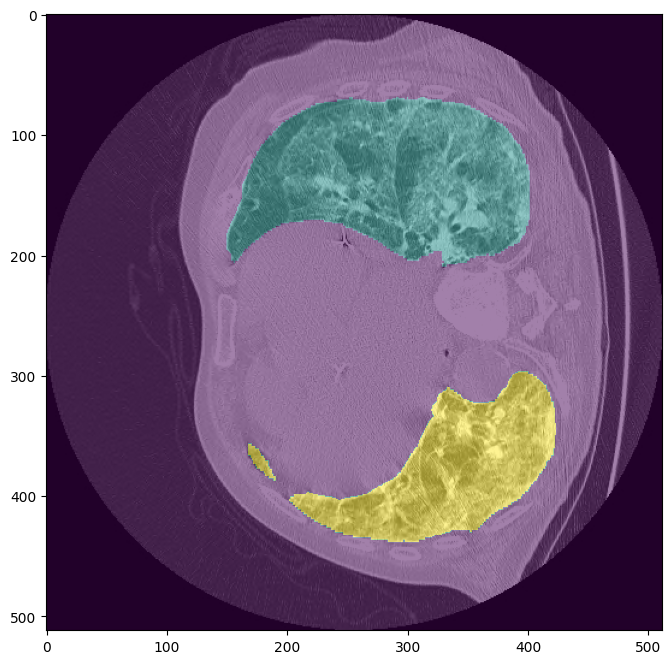

In [15]:
fig = plt.figure(figsize=(10,8))
plt.imshow(training_images_nii[..., 0], cmap="gray")
plt.imshow(training_lung_masks_nii[..., 0], cmap="viridis", alpha=0.5)
#plt.imshow(training_infection_masks_nii[..., 0], cmap="jet", alpha=0.5)